Task 4.9 part 2

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# importing the new file

# path to the folder 
path = r'/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/02 Data'

# importing the 'merged' file, output of the 1st part of the task
merged = pd.read_pickle(os.path.join(path, 'Prepared data', 'merged_df_output_4_9.pkl'))

In [4]:
# checing the df 

merged.head(5)

,Unnamed: 0_x,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,joining_date,quantity_of_dependants,marital_status,annual_income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,0,2539329,1,1,2,8,NaN,14084,2,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,0,2539329,1,1,2,8,NaN,12427,3,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,0,2539329,1,1,2,8,NaN,26088,4,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,0,2539329,1,1,2,8,NaN,26405,5,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


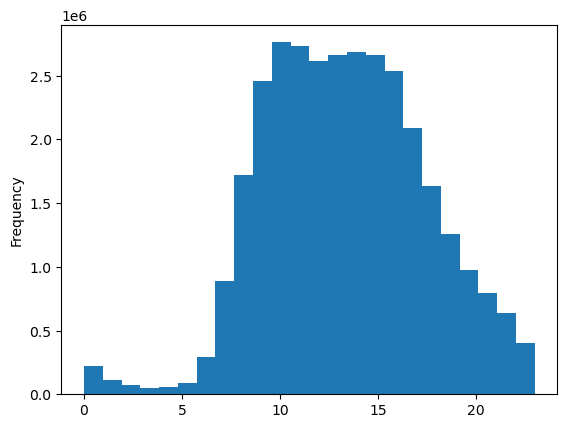

In [5]:
# creating a histogram of the “order_hour_of_day” column

hist = merged['order_hour_of_day'].plot.hist(bins = 24)

In [6]:
merged['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

The most active hours are between 11 am and 5 pm. 

In [8]:
# creating a bar chart for distrubution of orders among the customers based on loyalty flag

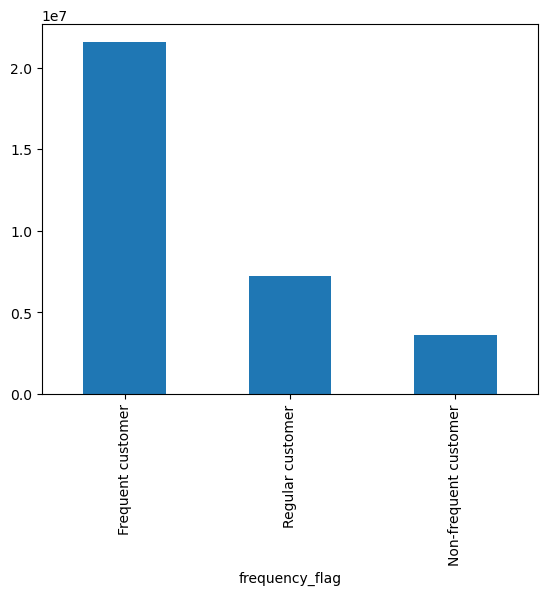

In [9]:
plotbar = merged['frequency_flag'].value_counts().plot.bar()

In [10]:
# Check expenditure dependence on the hour of the day 

# Checking of the shape for both variables

merged.shape

(32404859, 32)

In [11]:
# Sampling based on 30/70 ratio

In [12]:
np.random.seed(4)

In [13]:
train_mask = np.random.rand(len(merged)) <= 0.7

In [14]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [15]:
small = merged[~train_mask]

In [16]:
small.shape

(9721098, 32)

In [17]:
subset_price_vs_order_day_of_week = small[['order_day_of_week','prices']]

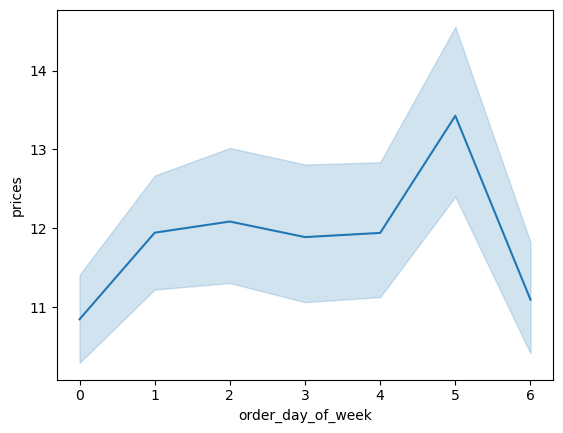

In [18]:
line_1 = sns.lineplot(data = subset_price_vs_order_day_of_week, x = 'order_day_of_week',y = 'prices')

Based on sample on Fridays customers tend to buy the most exspensive groceries. 

In [20]:
subset_age_vs_quantity_of_dependants = small[['age','quantity_of_dependants']]

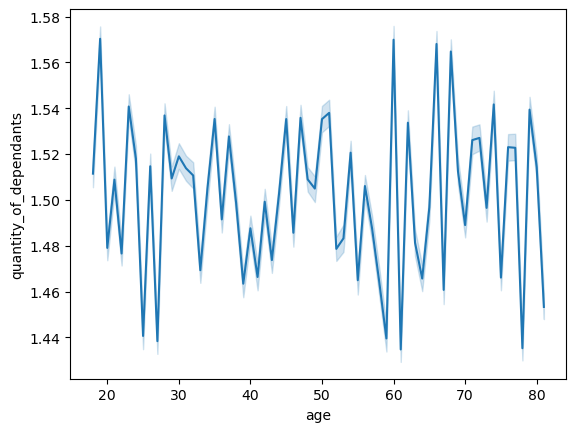

In [21]:
line_2 = sns.lineplot(data = subset_age_vs_quantity_of_dependants, x = 'age',y = 'quantity_of_dependants')

The quantity of dependants fluctuates significantly across ages, with no clear linear trend observed. The average values range narrowly between 1.44 and 1.58, likely due to aggregation. The shaded confidence interval indicates variability or uncertainty, suggesting noise or outliers in the data. Grouping ages into bins (e.g., 5 or 10 years) could help smooth these fluctuations and reveal clearer patterns.

In [23]:
subset_age_vs_income = small[['age','annual_income']]

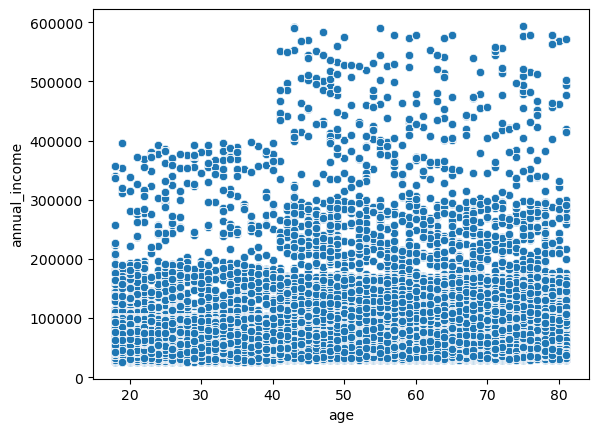

In [24]:
scatterplot = sns.scatterplot(x = 'age', y = 'annual_income',data = subset_age_vs_income)

The scatterplot shows the relationship between age and annual income, with no clear linear trend observed. Most data points cluster in the lower income range (0 to 200,000), indicating that a majority of individuals earn relatively low incomes. Higher incomes (above 400,000) are sparsely distributed across all ages, highlighting income inequality. Overall, income variation appears unrelated to age in a significant way.

In [26]:
# saving the chart as .png file

# histogram of the “order_hour_of_day” column
hist.figure.savefig('/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hour_of_day.png')

In [27]:
# bar chart for distribution of orders among the customers based on loyalty flag
plt.savefig('/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hour_of_day.png')

<Figure size 640x480 with 0 Axes>

In [28]:
# line graph for age_vs_quantity_of_dependants
line_1.figure.savefig('/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hour_of_day.png')

In [29]:
# line graph for age_vs_quantity_of_dependants
line_2.figure.savefig('/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hour_of_day.png')

In [30]:
# scatterplot of age_vs_income
scatterplot.figure.savefig('/Users/emilsafarov/Library/CloudStorage/OneDrive-Personal/CF/A4_Python/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hour_of_day.png')